In [154]:
# Read the data from the csv file
from pandas import read_csv

file_path = 'Australian Vehicle Prices.csv'
df = read_csv(file_path)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [155]:
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 16734


In [156]:
# Check for missing values
df.isnull().sum()

Brand                   1
Year                    1
Model                   1
Car/Suv                28
Title                   1
UsedOrNew               1
Transmission            1
Engine                  1
DriveType               1
FuelType                1
FuelConsumption         1
Kilometres              1
ColourExtInt            1
Location              450
CylindersinEngine       1
BodyType              282
Doors                1604
Seats                1705
Price                   3
dtype: int64

In [157]:
# Drop rows with missing values in the 'Price' column since it is the target variable.
df = df.dropna(subset=['Price'])

# There are some entries that are not integers, including '-' and '- / -'
# Converet non NaN entries to numeric values.
from pandas import to_numeric

df['Kilometres'] = to_numeric(df['Kilometres'], errors='coerce')
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                27
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption         0
Kilometres            591
ColourExtInt            0
Location              449
CylindersinEngine       0
BodyType              281
Doors                1602
Seats                1703
Price                   0
dtype: int64

In [158]:
# Drop rows with missing values in the 'Kilometres' column

df.dropna(subset=['Kilometres'], inplace=True)

In [159]:
# Handel all Numeric variables by extracting values and converting them to the correct data type

df['Year'] = df['Year'].astype(int)
df['EngineL'] = df['Engine'].str.extract(r'(\d+\.?\d*) L', expand=False).astype('float32')
df['FuelConsumption'] = df['FuelConsumption'].str.extract(r'(\d+\.?\d*) L.*', expand=False).astype('float32')
df['CylindersinEngine'] = df['CylindersinEngine'].str.extract(r'(\d+) (?:cyl|L)', expand=False).astype('Int64')
df['Doors'] = df['Doors'].str.extract(r'(\d+) Doors', expand=False).astype('Int64')
df['Seats'] = df['Seats'].str.extract(r'(\d+) Seats', expand=False).astype('Int64')

In [160]:
# Introducing a new column 'Age' to know the age of the car
from datetime import date

date.today().year
df['CarAge']=date.today().year-df['Year']
df['CarAge'] = df['CarAge'].astype(int)
df.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,...,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price,EngineL,CarAge
0,Ssangyong,2022,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,...,5595.0,White / Black,"Caringbah, NSW",4,SUV,4,7,51990,2.2,2
1,MG,2022,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,...,16.0,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990,1.5,2
2,BMW,2022,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,...,8472.0,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988,2.0,2
3,Mercedes-Benz,2011,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,...,136517.0,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990,5.5,13
4,Renault,2022,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,...,1035.0,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990,1.3,2


In [161]:
df.isnull().sum()

Brand                   0
Year                    0
Model                   0
Car/Suv                 3
Title                   0
UsedOrNew               0
Transmission            0
Engine                  0
DriveType               0
FuelType                0
FuelConsumption      1659
Kilometres              0
ColourExtInt            0
Location                0
CylindersinEngine    1636
BodyType              269
Doors                1636
Seats                1659
Price                   0
EngineL              1637
CarAge                  0
dtype: int64

In [162]:
def delete_rows_with_nan(df):
    """
    Deletes all rows from the given DataFrame that contain any NaN values.

    Parameters:
    - df: pandas.DataFrame

    Returns:
    - A new DataFrame with rows containing any NaN values removed.
    """
    # Drop rows with any NaN values
    clean_df = df.dropna()
    
    return clean_df

df = delete_rows_with_nan(df)
df.isnull().sum()

Brand                0
Year                 0
Model                0
Car/Suv              0
Title                0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
ColourExtInt         0
Location             0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
EngineL              0
CarAge               0
dtype: int64

In [163]:
num_entries = len(df)
print(f"Number of entries: {num_entries}")

Number of entries: 14480


In [164]:
df.describe()

,Year,FuelConsumption,Kilometres,CylindersinEngine,Doors,Seats,EngineL,CarAge
count,14480.000000,14480.000000,14480.000000,14480.0,14480.0,14480.0,14480.000000,14480.000000
mean,2016.196064,7.737472,99928.234116,4.423204,4.02279,5.121685,2.394068,7.803936
std,4.907785,2.212485,78174.252605,1.103167,0.670971,1.087434,0.885614,4.907785
min,1978.000000,0.000000,1.000000,0.0,2.0,2.0,0.000000,1.000000
25%,2013.000000,6.600000,40871.000000,4.0,4.0,5.0,2.000000,4.000000
50%,2017.000000,7.600000,84915.500000,4.0,4.0,5.0,2.200000,7.000000
75%,2020.000000,8.800000,146499.500000,4.0,4.0,5.0,2.800000,11.000000
max,2023.000000,27.000000,526162.000000,12.0,5.0,22.0,7.300000,46.000000


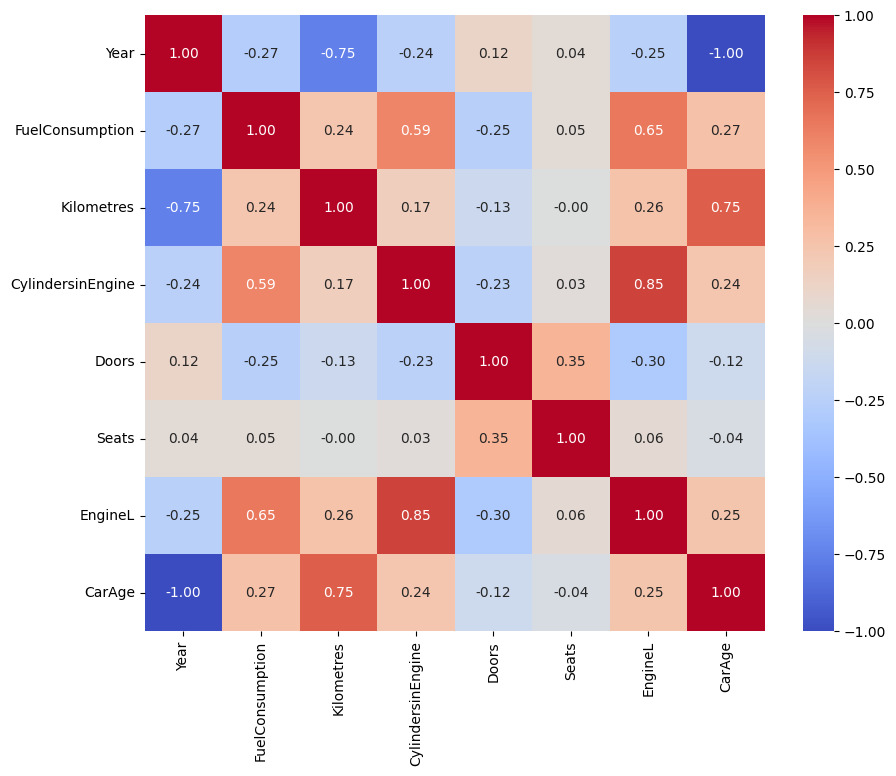

In [165]:
from seaborn import heatmap
from matplotlib.pyplot import figure, show

# Select only numerical columns from the DataFrame
numerical_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
figure(figsize=(10, 8))
heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
show()

In [166]:
df.nunique()

Brand                   64
Year                    39
Model                  645
Car/Suv                232
Title                 7078
UsedOrNew                3
Transmission             3
Engine                  90
DriveType                5
FuelType                 8
FuelConsumption        152
Kilometres           12974
ColourExtInt           707
Location               593
CylindersinEngine        9
BodyType                10
Doors                    4
Seats                   12
Price                 3173
EngineL                 59
CarAge                  39
dtype: int64